<a href="https://colab.research.google.com/github/amitaucs/tensorflowexplore/blob/master/alexasentimentclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# Import Dataset


In [0]:
alexa_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/amazon-alexa.tsv', sep= '\t')

In [0]:
alexa_df

In [0]:
alexa_df['verified_reviews']

# Visualization of Data

In [0]:
positive = alexa_df[alexa_df['feedback'] ==1]

In [0]:
positive

In [0]:
negative = alexa_df[alexa_df['feedback'] ==0]

In [0]:
negative

In [0]:
sns.countplot(alexa_df['feedback'], label='Count')

In [0]:
sns.countplot(x = 'rating', data= alexa_df)

In [0]:
alexa_df['rating'].hist(bins = 5)

In [0]:
plt.figure(figsize=(40,50))
sns.barplot(x = 'variation',y='rating', data = alexa_df, palette='deep')

In [0]:
alexa_df = alexa_df.drop(['date','rating'], axis=1)

In [0]:
alexa_df

In [0]:
#Read dummy variable trap
variation_dummies = pd.get_dummies(alexa_df['variation'], drop_first= True)

In [0]:
variation_dummies

In [0]:
#inplace = True ensures actual drop of the column in memory
alexa_df.drop(['variation'],axis=1, inplace= True)

In [0]:
alexa_df

In [0]:
alexa_df = pd.concat([alexa_df, variation_dummies], axis=1)

In [0]:
alexa_df

# Count Vectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data =['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [0]:
X

In [0]:
print(X.toarray())

In [0]:
print(vectorizer.get_feature_names())

# Apply count vectorizer on data

In [0]:
vectorizer = CountVectorizer()
alexa_countvct = vectorizer.fit_transform(alexa_df['verified_reviews'])

In [0]:
alexa_countvct

In [0]:
alexa_countvct.shape

In [0]:
print(vectorizer.get_feature_names())

In [0]:
print(alexa_countvct.toarray())

In [0]:
alexa_df.drop(['verified_reviews'],axis=1, inplace=True)

In [0]:
#Array can not be concatenate hence converted to dataframe
reviews = pd.DataFrame(alexa_countvct.toarray())

In [0]:
alexa_df = pd.concat([alexa_df,reviews],axis=1)

In [0]:
X = alexa_df.drop(['feedback'],axis=1)

In [0]:
X

In [0]:
y = alexa_df['feedback']

# Train the model

In [40]:
X.shape

(3150, 4059)

In [41]:
y.shape

(3150,)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [43]:
X_train.shape

(2520, 4059)

In [44]:
X_test.shape

(630, 4059)

In [0]:
ANN_classifier = tf.keras.models.Sequential()
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu',input_shape=(4059,)))
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
ANN_classifier.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [48]:
ANN_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               1624000   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 1,784,801
Trainable params: 1,784,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Read what is binary_crossentropy and , metrics accuracy
ANN_classifier.compile(optimizer='Adam', loss ='binary_crossentropy',metrics = ['accuracy'])

In [55]:
epochs_hist = ANN_classifier.fit(X_train,y_train,epochs = 10)

Epoch 1/10
2520/2520 [==============================] - 2s 698us/sample - loss: 0.2718 - accuracy: 0.9063
Epoch 2/10
2520/2520 [==============================] - 2s 636us/sample - loss: 0.0886 - accuracy: 0.9651
Epoch 3/10
2520/2520 [==============================] - 2s 629us/sample - loss: 0.0362 - accuracy: 0.9877
Epoch 4/10
2520/2520 [==============================] - 2s 631us/sample - loss: 0.0214 - accuracy: 0.9921
Epoch 5/10
2520/2520 [==============================] - 2s 619us/sample - loss: 0.0189 - accuracy: 0.9929
Epoch 6/10
2520/2520 [==============================] - 2s 651us/sample - loss: 0.0182 - accuracy: 0.9925
Epoch 7/10
2520/2520 [==============================] - 2s 626us/sample - loss: 0.0177 - accuracy: 0.9929
Epoch 8/10
2520/2520 [==============================] - 2s 639us/sample - loss: 0.0160 - accuracy: 0.9933
Epoch 9/10
2520/2520 [==============================] - 2s 632us/sample - loss: 0.0169 - accuracy: 0.9929
Epoch 10/10
2520/2520 [=======================

# Evaluate the model

In [56]:
y_predict_train = ANN_classifier.predict(X_train)
y_predict_train

array([[0.9999996 ],
       [0.00144842],
       [1.        ],
       ...,
       [1.        ],
       [0.00351018],
       [1.        ]], dtype=float32)

In [0]:
y_predict_train = (y_predict_train > 0.5)

In [58]:
y_predict_train

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

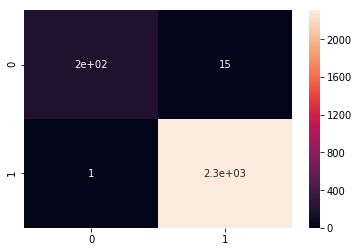

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot= True)

In [61]:
#Now doing eith test data
y_predict_test = ANN_classifier.predict(X_test)
y_predict_test

array([[9.99642074e-01],
       [8.58055949e-01],
       [9.99996424e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99854803e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99985278e-01],
       [9.99998808e-01],
       [1.00000000e+00],
       [9.99997497e-01],
       [1.00000000e+00],
       [9.99998927e-01],
       [1.00000000e+00],
       [9.98381257e-01],
       [9.99999881e-01],
       [1.00000000e+00],
       [9.99969482e-01],
       [1.00000000e+00],
       [9.93890405e-01],
       [9.51058924e-01],
       [9.99999046e-01],
       [9.99998093e-01],
       [1.07538700e-03],
       [9.99996543e-01],
       [9.99998629e-01],
       [9.99999285e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99704421e-01],
       [9.99977052e-01],
       [9.99998331e-01],
       [9.99999881e-01],
       [8.58055949e-01],
       [1.00000000e+00],
       [9.99999642e-01],
       [9.99998689e-01],
       [1.00000000e+00],
       [9.83637094e-01],


In [0]:
y_predict_test = (y_predict_test > 0.5)

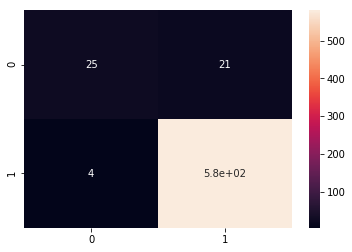

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot= True)

In [67]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

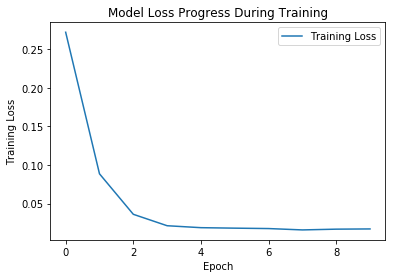

In [68]:
plt.plot(epochs_hist.history['loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

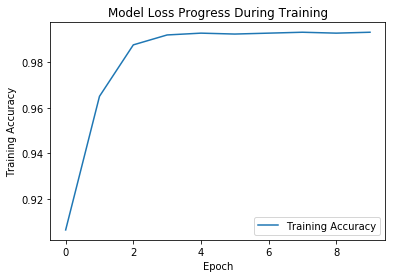

In [69]:
plt.plot(epochs_hist.history['accuracy'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])